
--- 
## L08 - Model capacity and under/overfitting [__Optional assignment chosen__]

In this assignment, we will look into the problems of under- and overfitting and how to solve it.

### Qa) Explain the polynomial fitting via code review

Review the code below, write a __short__ code review summary, and explain how the polynomial fitting is implemented?

Firstly data is generated by defining a 'true function', and by using `GenerateData()` we add some random noise to the samples (the noise appears on the plot as well).

The code afterwards iterates over three different degrees (1, 4 and 15). In the loop, it constructs a pipeline with both polynomial features (generated using sklearn) and a linear regression model.

After creating the pipeline, we use a 10 fold cross-validation to estimate the model's performance. Then the model is fitted on the data, and predictions are made, where the MSE and standard deviation are being printed for each polynomial degree (the three mentioned earlier).

The results are plotted, showing both the true function and the model predictions for each polynomial degree. The plot demonstrates how complexity affects its performance, especially the consequences of under- and overfitting.





Iterating...degrees= [1, 4, 15]
  degree=   1, score_mean=-0.41,  PolynomialFeatures(degree=1, include_bias=False)
    CV sub-scores:  mean = -0.41,  std = 0.43
      CV fold 0  =>  score = -1.2
      CV fold 1  =>  score = -0.2
      CV fold 2  =>  score = -0.044
      CV fold 3  =>  score = -0.36
      CV fold 4  =>  score = -0.28
      CV fold 5  =>  score = -0.3
      CV fold 6  =>  score = -0.18
      CV fold 7  =>  score = -0.0086
      CV fold 8  =>  score = -0.25
      CV fold 9  =>  score = -1.3
  degree=   4, score_mean=-0.04,  PolynomialFeatures(degree=4, include_bias=False)
    CV sub-scores:  mean = -0.043,  std = 0.071
      CV fold 0  =>  score = -0.25
      CV fold 1  =>  score = -0.042
      CV fold 2  =>  score = -0.027
      CV fold 3  =>  score = -0.029
      CV fold 4  =>  score = -0.0049
      CV fold 5  =>  score = -0.0049
      CV fold 6  =>  score = -0.019
      CV fold 7  =>  score = -0.038
      CV fold 8  =>  score = -0.012
      CV fold 9  =>  score = -0.00

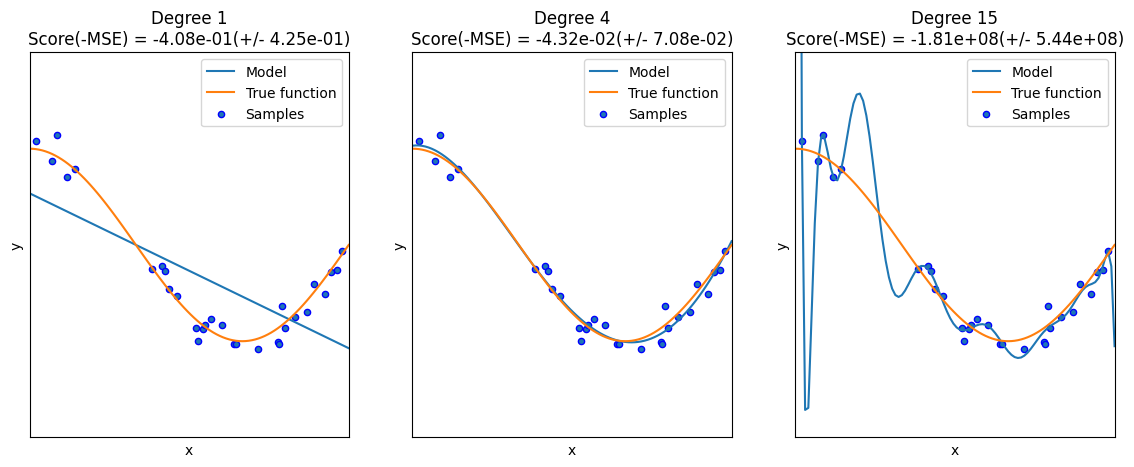

OK


In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X[:, np.newaxis], y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression",   linear_regression)
        ])
    
    
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error", cv=10)
    
    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    pipeline.fit(X, y)
    X_test = np.linspace(0, 1, 100)[:, np.newaxis]
    y_pred = pipeline.predict(X_test)
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
    
    # CEF: loop added, prints each score per CV-fold. 
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")
        
plt.show()
print('OK')

### Qb) Explain the capacity and under/overfitting concept

Capacity is basically describing a models ability to find underlying patterns that are present in the data given. A model with a higiher capacity is capable (potentially) to learn more complex functions, where low capacity models are simpler and might only find basic patterns.

As seen on the first plot, an underfitting occours when using a polynomial degree of just 1. The model fails to fit the true function by not finding the patterns from the data, and thereby displaying a high bias.

The last plot shows signs of overfitting when using a polynomial degree of 15. It is seen that the model actually fits the training data almost perfectly, but the predictions is pretty far from the true function, especially at the edges of the data range. It's not able to generalize the data well, which results in a low bias and a high variance.

A better fit is shown with a polynomial degree of 4, which the middle plot clearly states. The model fits the data nicely, and it's able to find the underlying patterns and neither under- or overfit, which means the model's capacity is well, and the generalization is good.

### Qc) Score method

Using the usual cross-validation scoring method, we expect a higher value to represent a better performance. But by using the scoring method `neg_mean_squared_error` in case of the MSE, lower values will indicate a better performance instead.

The $MSE$ function goes from being a cost-function during the training to a scoring function during the evaluation, with here cross-validation. Its basically because of the objective changes. During the training phase we want to optimize parameters to minimize the cost function. Instead of focusing on adjusting the model to fit the data perfectly, we during the evaluation want to see how the model can make accurate predictions on new and unseen data.

Setting it to `mean_squared_error` throws an exception, as it is not a valid scoring method for cross-validation. It expects a scoring method that calculates a score based on true answers and predictions made by the model. `mean_squared_error` calculates a number of how average wrong the predictions are, with a minimum score that (theoretically) shouldnt be able to go below 0 - but has a high upper boundary depending on the data. The below image shown part of the thrown exeception.

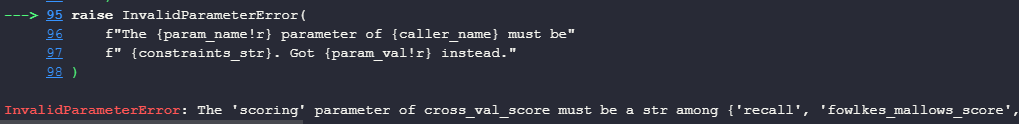

The score of the Degree 15 model has a very large negative score, as its performance is very poor and the predictions are far off the true values. It fails to generalize data, it overfits and its very complex, which the negative score clearly states.
